Example of PCA applied to the biopsy data set, following http://wilkelab.org/classes/SDS348/2015_spring_worksheets/class9_solutions.html.  
Author: TC

In [108]:
%matplotlib inline
import matplotlib
import numpy
import math
import itertools
import matplotlib.pyplot as plt
import IPython
import time
import urllib2
from matplotlib import rcParams
rcParams['figure.figsize'] = [10.0, 6.0]
rcParams['figure.dpi'] = 256
print 'last modified: ' + time.strftime('%c')

last modified: Mon Feb 23 22:56:28 2015


In [131]:
# retrieve data
address_csv = 'http://wilkelab.org/classes/SDS348/data_sets/biopsy.csv'
data = numpy.genfromtxt(urllib2.urlopen(address_csv),
                            delimiter=',', skip_header=1,
                            usecols=range(9))
outcomes = numpy.genfromtxt(urllib2.urlopen(address_csv),
                               delimiter=',', skip_header=1,
                               usecols=(9), dtype=None)
print data.shape
print outcomes.shape
outcomes = outcomes == 'benign'
D = len(data[0])

(683, 9)
(683,)


In [132]:
# compute averages and variances
av = numpy.mean(data, axis=0)
av2 = numpy.mean(data ** 2, axis=0)
var = av2 - av ** 2
# construct correlation matrix C
C = numpy.zeros(shape=(D, D))
for i in xrange(D):
    for j in xrange(i + 1):
        C[i, j] = ((numpy.mean(data[:, i] * data[:, j]) - av[i] * av[j]) /
                   math.sqrt(var[i] * var[j]))
        C[j ,i] = c[i, j]
# diagonalize c and find principal component (PC)
evals, evects = numpy.linalg.eig(c)
i_sorted = numpy.argsort(-evals)
evals, evects = evals[i_sorted], evects[:, i_sorted]

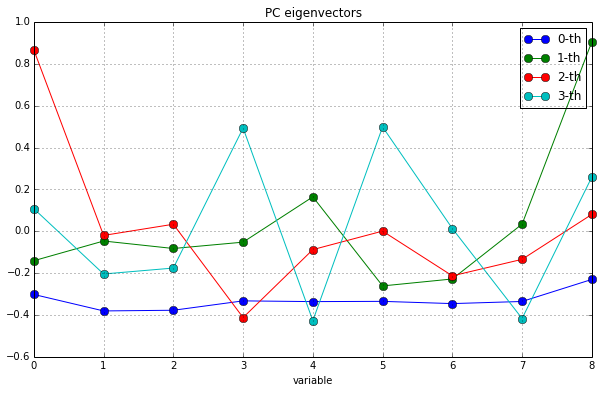

In [133]:
# show the first PC eigenvectors
plt.title('PC eigenvectors')
plt.xlabel('variable')
for i in xrange(4):
    e, v = evals[i], evects[:, i]
    plt.plot(v, 'o-', ms=8, clip_on=False, label='%i-th' % i)
plt.grid()
plt.legend()
plt.xticks(range(D))
plt.show()

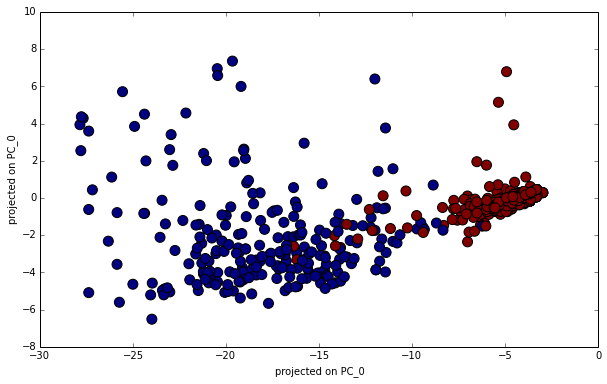

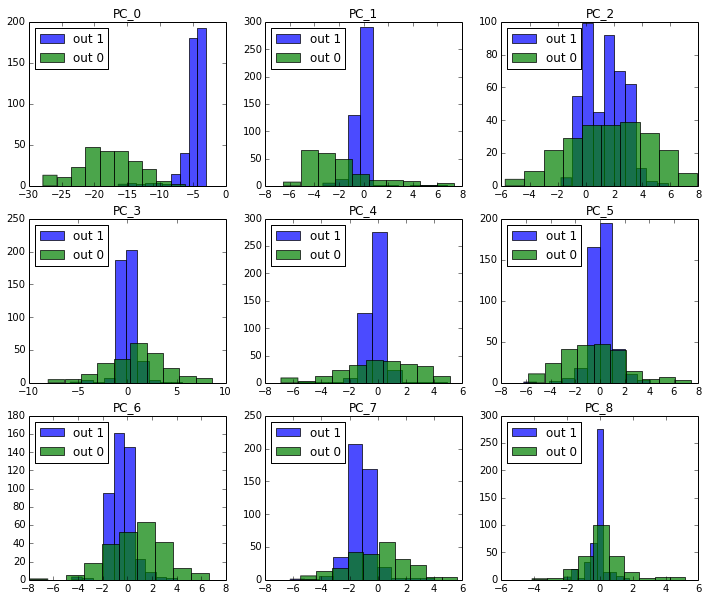

In [142]:
# project samples onto PC eigenvectors
x_proj = numpy.dot(data, evects)
i, j = 0, 1
plt.xlabel('projected on PC_%i' % i)
plt.ylabel('projected on PC_%i' % i)
plt.scatter(x_proj[:, i], x_proj[:, j], s=100, c=outcomes)
plt.show()
plt.clf()
# show histograms of samples projected on each PC eigenvector
plt.figure(figsize=(12.0,10.0))
for i in xrange(D):
    plt.subplot(3, 3, i + 1)
    plt.title('PC_%i' % i)
    plt.hist(x_proj[outcomes, i], alpha=0.7, label='out 1')
    plt.hist(x_proj[True - outcomes, i], alpha=0.7, label='out 0')
    plt.legend(loc=2)
plt.show()